In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [35]:
def read_csv(file):
    return pd.read_csv(file)

def cleanup_data(data):
    # remove games when he didn't play
    data = data.drop(data[data.G.isnull()].index)

    # normalize age to years
    data['Age'] = data['Age'].str.split('-', 1).str[0].astype(int)

    # normalize minutes to exclude seconds
    data['MP'] = data["MP"].str.split(":").str[0].astype(int)
    
    data['PTS'] = data['PTS'].astype(int)
    return data

def read_and_clean_csv(file, columns=[]):
    data = read_csv(file)
    clean_data = cleanup_data(data)
    return clean_data[columns]

csv_label_name = "PTS" # points per game "+/-"
feature_names = ["G", "MP", "Age"]
csv_column_names = feature_names + [csv_label_name]

feature_columns = [
    tf.feature_column.numeric_column(feature) for feature in feature_names
]

def read_seasons(seasons=range(2002,2018)):
    stats = []
    for season in seasons:
        file = str(season) + ".csv"
        season_stat = read_and_clean_csv(file, columns=csv_column_names)
        stats.append(season_stat)
    return pd.concat(stats)

stats = read_seasons(seasons=range(2002,2018))
test_factor = 0.2
train, test = stats[int(len(stats)*test_factor):], stats[:int(len(stats)*test_factor)]

In [36]:
print("test:" + str(test.shape) + " train: " + str(train.shape) + " stats: " + str(stats.shape))

test:(211, 4) train: (846, 4) stats: (1057, 4)


In [37]:
input_fn_train = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : train["Age"].values,
        "MP" : train["MP"].values,
        "G" : train["G"].values
    }),
    y = pd.Series(train.PTS.values),
    shuffle=False,
    num_epochs=20000
)

In [38]:
# estimator = tf.estimator.DNNRegressor(hidden_units=[10, 10], feature_columns=feature_columns)
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x118d214d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmpa31CTQ', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [39]:
# train
estimator.train(input_fn=input_fn_train, steps=20000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmpa31CTQ/model.ckpt.
INFO:tensorflow:loss = 39053.0, step = 1
INFO:tensorflow:global_step/sec: 458.616
INFO:tensorflow:loss = 7690.9355, step = 101 (0.220 sec)
INFO:tensorflow:global_step/sec: 553.931
INFO:tensorflow:loss = 5169.909, step = 201 (0.180 sec)
INFO:tensorflow:global_step/sec: 550.988
INFO:tensorflow:loss = 4072.4434, step = 301 (0.182 sec)
INFO:tensorflow:global_step/sec: 491.35
INFO:tensorflow:loss = 3915.8809, step = 401 (0.204 sec)
INFO:tensorflow:global_step/sec: 560.262
INFO:tensorflow:loss = 3444.443, step = 501 (0.178 sec)
INFO:tensorflow:global_step/sec: 568.118
INFO:tensorflow:loss = 2685.8794, step = 601 (0.177 sec)
INFO:tensorflow:glob

INFO:tensorflow:loss = 3502.4216, step = 8001 (0.198 sec)
INFO:tensorflow:global_step/sec: 567.991
INFO:tensorflow:loss = 3824.9712, step = 8101 (0.177 sec)
INFO:tensorflow:global_step/sec: 571.991
INFO:tensorflow:loss = 2936.1494, step = 8201 (0.174 sec)
INFO:tensorflow:global_step/sec: 563.651
INFO:tensorflow:loss = 2725.5725, step = 8301 (0.179 sec)
INFO:tensorflow:global_step/sec: 609.44
INFO:tensorflow:loss = 3390.9302, step = 8401 (0.163 sec)
INFO:tensorflow:global_step/sec: 595.916
INFO:tensorflow:loss = 5682.003, step = 8501 (0.168 sec)
INFO:tensorflow:global_step/sec: 495.907
INFO:tensorflow:loss = 6295.356, step = 8601 (0.200 sec)
INFO:tensorflow:global_step/sec: 353.583
INFO:tensorflow:loss = 4637.3516, step = 8701 (0.285 sec)
INFO:tensorflow:global_step/sec: 363.736
INFO:tensorflow:loss = 3562.2842, step = 8801 (0.273 sec)
INFO:tensorflow:global_step/sec: 449.125
INFO:tensorflow:loss = 4007.5352, step = 8901 (0.222 sec)
INFO:tensorflow:global_step/sec: 467.133
INFO:tensorfl

INFO:tensorflow:global_step/sec: 533.461
INFO:tensorflow:loss = 6365.622, step = 16301 (0.188 sec)
INFO:tensorflow:global_step/sec: 565.809
INFO:tensorflow:loss = 4704.9873, step = 16401 (0.176 sec)
INFO:tensorflow:global_step/sec: 579.885
INFO:tensorflow:loss = 3681.4255, step = 16501 (0.171 sec)
INFO:tensorflow:global_step/sec: 559.534
INFO:tensorflow:loss = 4295.3525, step = 16601 (0.180 sec)
INFO:tensorflow:global_step/sec: 515.159
INFO:tensorflow:loss = 2797.345, step = 16701 (0.194 sec)
INFO:tensorflow:global_step/sec: 504.665
INFO:tensorflow:loss = 2642.4365, step = 16801 (0.197 sec)
INFO:tensorflow:global_step/sec: 571.155
INFO:tensorflow:loss = 4254.939, step = 16901 (0.178 sec)
INFO:tensorflow:global_step/sec: 521.722
INFO:tensorflow:loss = 7241.542, step = 17001 (0.190 sec)
INFO:tensorflow:global_step/sec: 533.886
INFO:tensorflow:loss = 5302.3184, step = 17101 (0.188 sec)
INFO:tensorflow:global_step/sec: 528.77
INFO:tensorflow:loss = 4495.955, step = 17201 (0.189 sec)
INFO:t

In [40]:
input_fn_test = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : test["Age"].values,
        "MP" : test["MP"].values,
        "G" : test["G"].values
    }),
    y = pd.Series(test.PTS.values),
    shuffle=False
)
evaluation = estimator.evaluate(input_fn=input_fn_test)
loss_score = evaluation["loss"]
print("Loss: {0:f}".format(loss_score))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-09-22:47:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmpa31CTQ/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-05-09-22:47:06
INFO:tensorflow:Saving dict for global step 20000: average_loss = 46.577263, global_step = 20000, loss = 4913.9014
Loss: 4913.901367


In [41]:
import itertools

input_fn_predict = tf.estimator.inputs.pandas_input_fn(
    x = pd.DataFrame({
        "Age" : test["Age"].values,
        "MP" : test["MP"].values,
        "G" : test["G"].values
    }),
    y=None, # we are predicting
    shuffle=False
)

predictions = estimator.predict(input_fn=input_fn_predict)
predictions = list(p["predictions"][0] for p in predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/55/qkrngbr949x1jzs0c0dt70wc0000gn/T/tmpa31CTQ/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


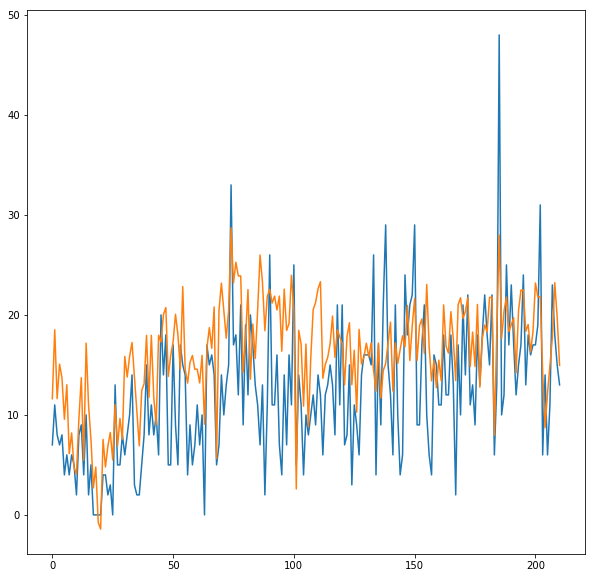

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(test.PTS.values)
plt.plot(predictions)

In [43]:
delta=test.PTS-predictions
np.abs(np.mean(delta)).round() # mean prediction error

4.0

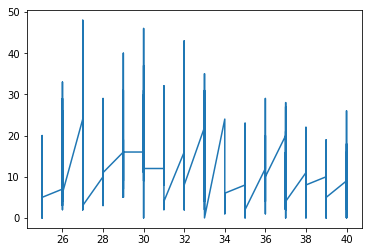

In [44]:
plt.plot(stats.Age, stats.PTS)
plt.show()